<a href="https://colab.research.google.com/github/AswinTony2001/FinalYearProject/blob/main/FinalEfficientNetNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

url = '/content/drive/MyDrive/Final Project Dataset'
# datasets
labels = pd.read_csv(url+"/Detection/Final Training Detection.csv")
sample = pd.read_csv(url+'/Detection/Final Training Detection.csv')
label2 = pd.read_csv(url+"/Detection/Final Testing Detection.csv")

# folders paths
train_path = url+"/Common/Training/Final Training Images"
test_path = url+"/Common/Testing/Final Testing Images"

Mounted at /content/drive


<ipython-input-2-936e1cf18e7b>:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  label2 = pd.read_csv(url+"/Detection/Final Testing Detection.csv")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import classification_report, confusion_matrix
 
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adagrad
from keras.preprocessing import image
 
import cv2
 

from tensorflow.keras.applications import * #Efficient Net included here
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import shutil
import pandas as pd
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
from IPython.display import display, Image
import tensorflow as tf
#Use this to check if the GPU is configured correctly
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 352527160674958941
xla_global_id: -1
]


In [ ]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, ... up to  7
# Higher the number, the more complex the model is. and the larger resolutions it  can handle, but  the more GPU memory it will need
# loading pretrained conv base model
#input_shape is (height, width, number of channels) for images
conv_base = EfficientNetB6(weights="imagenet", include_top=False, input_shape=(224,224,3))

165234480/165234480 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
model.add(layers.Dropout(0.2, name="dropout_out"))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(layers.Dense(7184, activation="softmax", name="fc_out"))
conv_base.trainable = False

In [ ]:
classes = ["cuis"]
for i in range(2,4):
  classes.append(f"Unnamed: {i}")
labels = labels.astype(object).replace(np.nan, 'None')
labels["CombinedColumns"] = labels[classes].apply(lambda x: x.tolist(), axis=1)

In [ ]:
classes = ["cuis"]
for i in range(2,4):
  classes.append(f"Unnamed: {i}")
label2 = label2.astype(object).replace(np.nan, 'None')
label2["CombinedColumns"] = label2[classes].apply(lambda x: x.tolist(), axis=1)

In [ ]:
def to_jpg(ID):
    return ID+".jpg"
 
 
labels['ID'] = labels['ID'].apply(to_jpg)
label2['ID'] = label2['ID'].apply(to_jpg)

In [ ]:
print(labels)

                                              ID      cuis Unnamed: 2  \
0      ImageCLEFmedCaption_2022_train_000001.jpg  C0002978   C0007177   
1      ImageCLEFmedCaption_2022_train_000002.jpg  C0002978   C0003489   
2      ImageCLEFmedCaption_2022_train_000003.jpg  C0002978   C0021102   
3      ImageCLEFmedCaption_2022_train_000004.jpg  C0002978   C0013931   
4      ImageCLEFmedCaption_2022_train_000005.jpg  C0002978   C0205100   
...                                          ...       ...        ...   
64995  ImageCLEFmedCaption_2022_train_065396.jpg  C0002978   C0227579   
64996  ImageCLEFmedCaption_2022_train_065397.jpg  C0002978   C0948355   
64997  ImageCLEFmedCaption_2022_train_065398.jpg  C0002978   C0221198   
64998  ImageCLEFmedCaption_2022_train_065399.jpg  C0002978       None   
64999  ImageCLEFmedCaption_2022_train_065400.jpg  C0002978   C1261316   

      Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0       C0031050       None       None       Non

In [ ]:
#Input_dir = '/content/drive/MyDrive/Final Project Dataset/Common/Testing/Final Testing Images'
#TRAIN_IMAGES_PATH = '/content/drive/MyDrive/Final Project Dataset/Common/Testing/Final Testing Images' #12000
#VAL_IMAGES_PATH = '/content/drive/MyDrive/Final Project Dataset/Common/Testing/Final Testing Images' #3000
#def preproccess_data(df, images_path):
#    for column, row in tqdm(df.iterrows(), total=len(df)):
#        class_id = row['cuis']
#        shutil.copy(os.path.join(Input_dir, f"{row['ID']}.jpg"), os.path.join(images_path, str(class_id)))
#df = pd.read_csv('/content/drive/MyDrive/Final Project Dataset/Detection/Final Testing Detection.csv')

#Split the dataset into 80% training and 20% validation
#df_train, df_valid = model_selection.train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
#run the  function on each of them
#preproccess_data(df_train, TRAIN_IMAGES_PATH)
#preproccess_data(df_valid, VAL_IMAGES_PATH)
#df.head()

In [ ]:
TRAIN_IMAGES_PATH = '/content/drive/MyDrive/Final Project Dataset/Common/Training/Final Training Images' #12000
VAL_IMAGES_PATH = '/content/drive/MyDrive/Final Project Dataset/Common/Training/Final Training Images' #3000
gen1 = ImageDataGenerator(
				rescale=1./224.,
				)

gen2 = ImageDataGenerator(
				rescale=1./224.,
				)

train_generator = gen1.flow_from_dataframe(
    labels ,
    # This is the target directory
    directory= TRAIN_IMAGES_PATH,
    x_col = 'ID',
    y_col = 'CombinedColumns',
    subset="training",
    color_mode="rgb",
    # All images will be resized to target height and width.
    target_size=(224, 224),
    batch_size=10,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode="categorical",
)
validation_generator = gen2.flow_from_dataframe(
    labels ,
    directory = VAL_IMAGES_PATH,
    x_col = 'ID',
    y_col = 'CombinedColumns',
    subset="training",
    color_mode="rgb",
    target_size=(224, 224),
    batch_size=10,
    class_mode="categorical",
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"],
)

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  warnings.warn(


Found 64996 validated image filenames belonging to 7184 classes.
Found 65000 validated image filenames belonging to 7184 classes.


In [ ]:
model.compile(optimizer='Adagrad',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Final Project Dataset/Models/cpEff22.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=1,
    use_multiprocessing=True,
    workers=4,
    callbacks=[cp_callback]
)

In [ ]:
model.save("/content/drive/MyDrive/Final Project Dataset/Models/EffModel33.h5")

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.10000000149011612\nValidation Accuracy: 0.15000000596046448')

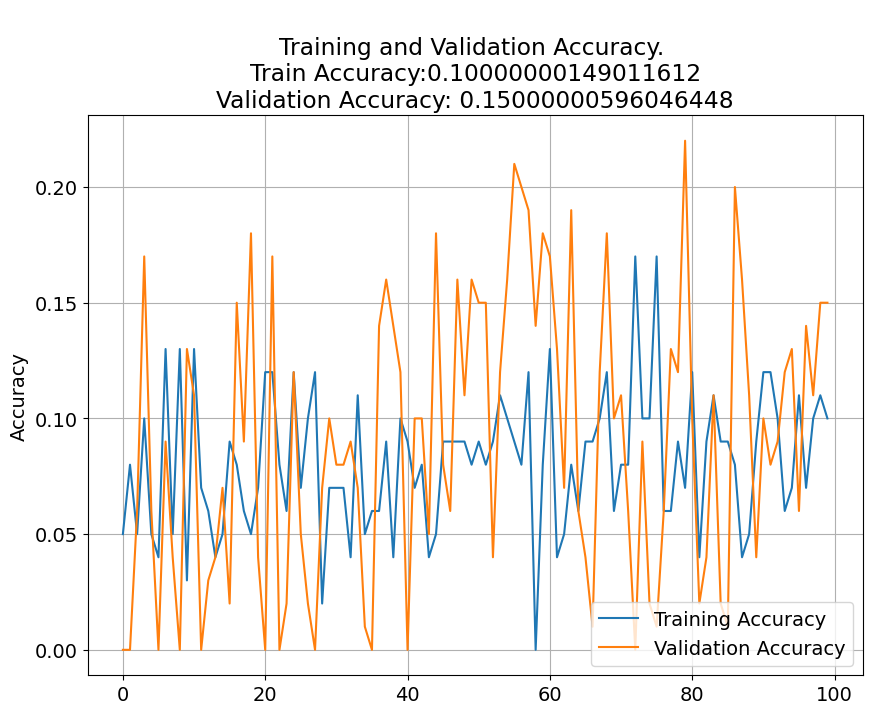

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')


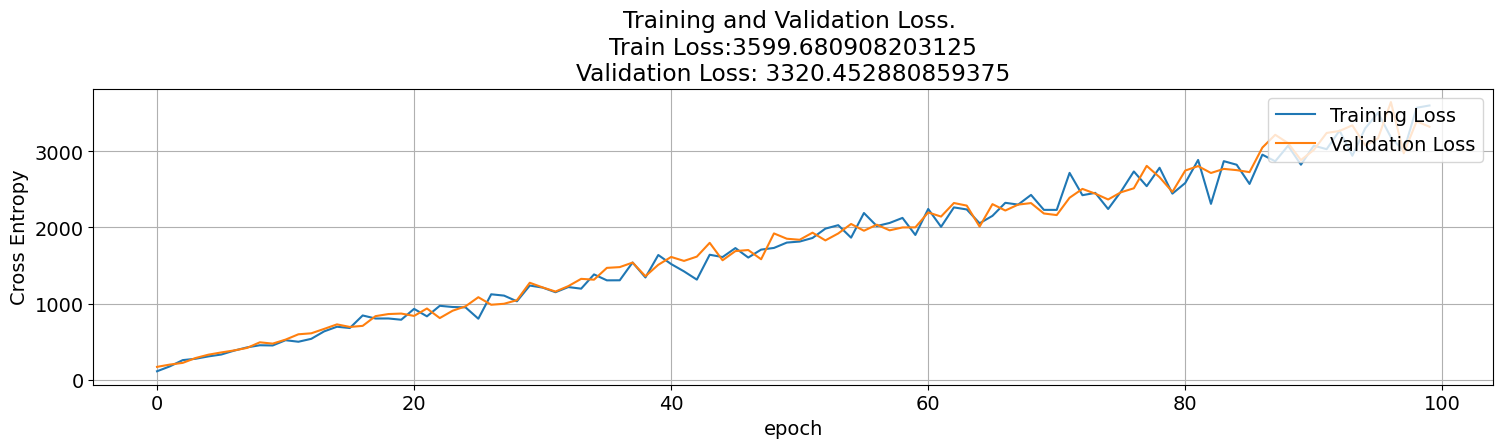

In [ ]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()


In [ ]:
#accuracy_score = model.evaluate(validation_generator)
#print(accuracy_score)
#print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

#print("Loss: ",accuracy_score[0])


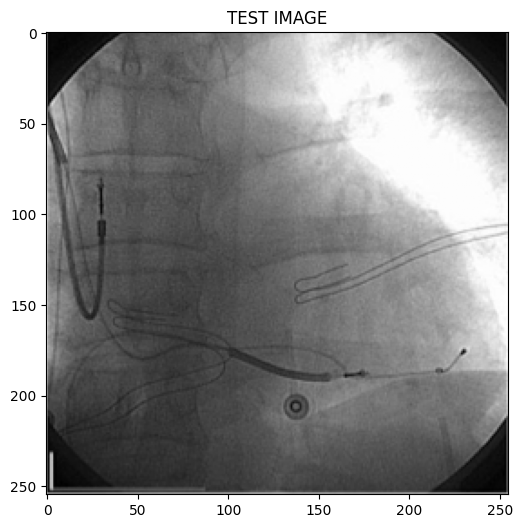

In [ ]:
test_img_path = test_path+"/ImageCLEFmedCaption_2022_train_065401.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (255, 255)).reshape(-1, 255, 255, 3)/255

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])


In [ ]:
predictions = []
predictions1 = []
i = 0
#model1 = keras.models.load_model("/content/drive/MyDrive/Project_Dataset/ModelRes11.h5")
img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
img = tf.reshape(img, (-1, 224, 224, 3))
prediction = model.predict(img)
print(prediction)
#print(prediction[0].count_nonzero(x==1))
predictions.append(list(prediction[0]))
print(predictions)
top_3_idx = np.argsort(prediction[0])[-3:] 
print(top_3_idx)
#main_dict = validation_generator.class_indices
#def threshold(thres,output):
#  actual = []
#  j = 0
#  for i in range(len(output[0])):
#    if(output[0][i]>=thres):
#     actual.append(list(main_dict.keys())[i])
#  return actual

#predictions1 = threshold(1.,predictions)

my_submission = {'ID': 'ImageCLEFmedCaption_2022_test_065401', 'cuis': top_3_idx}
#my_submission.to_csv('submission.csv', index=False)

# Submission file ouput
print("Submission File: \n---------------\n")
print(predictions1)
print(my_submission) # Displaying first five predicted output


1/1 [==============================] - 8s 8s/step
[[4.4895360e-06 1.4963244e-04 8.8568508e-05 ... 8.4264866e-06
  5.3786648e-06 3.2339693e-05]]
[[4.489536e-06, 0.00014963244, 8.856851e-05, 5.60917e-05, 0.002948276, 2.6920652e-05, 1.0522151e-05, 0.00013836013, 6.087065e-05, 1.9610507e-06, 4.66201e-05, 0.00026567173, 2.9172932e-05, 4.9006867e-05, 1.100003e-05, 0.0003219695, 5.626349e-05, 3.7538033e-05, 5.434816e-05, 0.00011395721, 8.272173e-05, 8.173157e-05, 4.5197235e-06, 9.241138e-06, 6.979104e-05, 0.00011739763, 2.1338752e-05, 0.00022050053, 1.5470978e-05, 9.6728845e-06, 0.00021791687, 3.3809803e-05, 2.1258145e-05, 2.7355663e-05, 4.0609644e-05, 0.00022387393, 1.4348482e-05, 0.00011587862, 1.3348179e-05, 1.26587e-05, 3.9073897e-05, 4.705808e-05, 2.6028692e-05, 1.8707999e-05, 3.8692774e-06, 0.00023329638, 2.0518302e-05, 0.0001785356, 1.7405937e-05, 6.918238e-05, 1.6418384e-05, 0.00024246472, 0.00012661025, 0.0003237723, 0.00018448559, 0.00070789043, 1.4705692e-05, 0.00013773433, 8.21221

In [ ]:
predictions = []
predictions1 = []
predictions2 = []
i = 0

for image in label2.ID:
  if i != 18275:
    main_dict = validation_generator.class_indices
    img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
    img = tf.reshape(img, (-1, 224, 224, 3))
    prediction = model.predict(img/224)
    #print(prediction)
    predictions.append(list(prediction[0]))
    #print(predictions)
    predictions2.append(np.argsort(prediction[0])[-3:]) 
    #print(predictions2)


    #predictions.append(np.argmax(prediction))
    #print(predictions)
    #def threshold(thres,output):
    #  actual = []
    #  j = 0
    #  for i in range(output[0]):
    #    if(output[0]>=thres):
    #      actual.append(list(main_dict.keys())[i])
    #    top_3_idx = np.argsort(actual[0])[-3:] 
    #  return top_3_idx
    #predictions1 = threshold(0.1,predictions)
    #print(predictions1)
    i = i+1
my_submission = pd.DataFrame({'ID': label2.ID, 'cuis': predictions2})
# my_submission.to_csv('/content/drive/MyDrive/Final Project Dataset/Models/submission1.csv', index=False)
my_submission.to_csv('/content/drive/MyDrive/Final Project Dataset/Models/submission21.csv', index=False)


# Submission file output
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output

In [ ]:
mapping_df = pd.read_csv('/content/drive/MyDrive/Final Project Dataset/Detection/72d678c1-c535-491d-bc42-c2ba11f47165_concepts.csv')

In [ ]:
Modality_Mapping = dict()
k = 0
l = 0
predictions = []
predictions1 = []
predictions2 = []
predictions4 = []
predictions5 = []
predictions6 = []
predictions7 = []
predictions3 = pd.read_csv("/content/drive/MyDrive/Final Project Dataset/Models/submission22.csv")
for i in range(0,5000):
  predictions4 = predictions3['cuis'][i].split()
  if k == 0:  
    predictions4.remove('[')
  else:
    predictions4[0] = predictions4[0].replace('[','')
  predictions4[2] = predictions4[2].replace(']','')
  predictions5.append(predictions4)  
  k = k + 1
for i in mapping_df.index:
  Modality_Mapping[mapping_df['concept'][i]] = mapping_df['concept_name'][i]
for x in range(0,5000):
  p =0
  for j in mapping_df.index:
    if str(j) == predictions5[x][1] or str(j) == predictions5[x][2]:
      if x >= 0 and x <= 500 and p == 0:
        predictions1.append(2300) 
        predictions2.append(mapping_df['concept'][2300])
        predictions.append(mapping_df['concept_name'][2300])
        p = p+1 
      if x >= 301 and x <= 5000 and p == 0:
        predictions1.append(8123) 
        predictions2.append(mapping_df['concept'][8123])
        predictions.append(mapping_df['concept_name'][8123])
        p = p+1 
      predictions1.append(j) 
      predictions2.append(mapping_df['concept'][j])
      predictions.append(mapping_df['concept_name'][j]) 

def split(list_a, chunk_size):
  for i in range(0, len(list_a), chunk_size):
    yield list_a[i:i + chunk_size]

chunk_size = 3
predictions6 = list(split(predictions2, chunk_size))
predictions7 = list(split(predictions, chunk_size))

In [ ]:
print(predictions6[2000])
print(predictions7[2000])

['C1306645', 'C1444662', 'C1710048']
['Plain x-ray', 'Discontinued', 'Semi-Circle']


In [ ]:
print(labels['CombinedColumns'][5])
print(predictions6[5])

['C0002978', 'C0205091', 'None']
['C0002978', 'C0032284', 'C0002978']


In [ ]:
print(label2['CombinedColumns'][4501])
print(predictions6[4501])

['C1306645', 'C0037303', 'C0205217']
['C1444662', 'C1710048', 'C1306645']


In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer

predictions3 = pd.read_csv("/content/drive/MyDrive/Final Project Dataset/Models/submission22.csv")
# define true labels
true_labels = ["a", "c", "b", "a"]

# define corresponding predicted labels
pred_labels = ["c", "c", "b", "a"]
score = []
for x in range(0,4500):
  #print(labels['CombinedColumns'][x])
  #print(predictions5[x])
  score.append(f1_score(label2['CombinedColumns'][x],predictions6[x], average="macro"))

def Average(lst):
    return sum(lst) / 4500

averageF1 = Average(score)
print(averageF1)
#score = f1_score(true_labels, pred_labels, average="micro")
#print("Micro F1-Score: ", score)

#score = f1_score(true_labels, pred_labels, average="weighted")
#print("Weighted F1-Score: ", score)

0.20253950617285313
